### Credits

Matt Drury designed this notebook, I just made a few minor modifications.

In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline

from plot_power import plot_power

plt.style.use("ggplot")

## Objectives (Morning)

- Review Null Hypothesis Significance Testing process
- Relate NHST and p-value to FPR and FNR
- Define power
- Give an example use case for computing power
- Discuss the interactions between power and the rejection level (alpha), effect size and sample size.

# **Statistical Power**

## 1. Hypothesis Testing: Review and Unanswered Questions

### 1.1. Review of Hypothesis Testing

We have previously discussed Null Hypothesis Significance Testing, a classic and popular procedure for deriving statistical information from data.  Let's review the process quickly:

> #### Null Hypothesis Significance Testing Procedure

> 1. State a scientific yes/no question
2. Take a skeptical stance: state a null hypothesis
3. State the opposite of your null hypothesis: the alternative hypothesis
4. Create a probabilistic model of the situation when the null is true
5. Determine how surprised you need to be to reject the null: determine a rejection level alpha
6. Collect your data
7. Calculate the conditional probability of finding a result equally or more extreme than you actually observed, assuming the null is true: this is your p-value
8. Compare the p-value to your stated rejection threshold, reject the null hypothesis if the p-value is smaller than your rejection level alpha

This whole process rests on our ability to compute a **p-value** 🚨

> The **p-value** is the conditional probability of observing a result equally or more extreme than we actually observed, assuming the null hypothesis is true.

In symbols the p-value is

$$ P(\text{Observe result equally or more extreme than actual} \mid H_0) $$

We also observed that the rejection level alpha has a nice interpretation under this scheme

> The rejection level alpha is the **false positive rate under the null**.  I.e., if the null hypothesis is true, it is the probability we would collect data that falsely rejects the null hypothesis.

We call this a **false positive** or **type-1 error** 🚨.  Clearly increasing alpha results in making more false positive errors, and decreasing alpha will result in less.

  - **positive** because we rejected the null, which we think of as a positive result (our research hypothesis is true, yay!)
  - **false** because we were wrong to do so, the null hypothesis is actually true!

Fisher viewed the p-value as a direct measure of evidence against the null, Neyman and Pearson viewed the entire procedure as a control on the false positive rate.

### 1.2. Unanswered Questions

There are a few points here we have left un-explored.

#### Bayesian Statistics

We would really, if at all possible, like to know the probability our research hypothesis is true, given the data we have collected

$$ P(H_{a} \mid \text{Data}) $$

This is **not** what the p-value measures.  Following this path leads us to a new dicipline, **Bayesian Statistics**, which we will touch on this afternoon.

#### Statistical Power

The p-value really only tells us half of the story.  It measures the rate we will falsely adopt positive beliefs, it would be wise to know how often we will flasely adopt negative beliefs.

A **false negative** or a **type 2 error**🚨 is the failure to reject a null hypothesis when it is actually false_.  As we mentioned, decreasing alpha results in less false positives, but there is a trade-off involved: it will *increase* our false negative rate.

The probability of making a false negative error, given that the null hypothesis is actually false, is called the **false negative rate**, and is denoted by beta

$$ \beta = P(\text{Fail to reject } H_0 \mid H_0 \text{ is false}) $$

More common in practice is 1 - beta, called the **statistical power** or just **power** 🚨

$$ \text{Power} = P( \text{Reject } H_0 \mid H_0 \text{ is false}) $$

Here's a summary of the relationship between all of these concepts

|             | Reject H_0           | Fail to reject H_0
|-------------|----------------------|---------------
|**H_0 false**| Correct (1 - beta)   | Type II error (beta)
|**H_0 true** | Type I error (alpha) | Correct (1 - alpha)


## 2. Statistical Power


### Introductory example

Let's setup an example we can use to explore the concept of statistical power, we'll continue our theme of Matt's quest to become a better skateboarder.

Matt would like to increase the height (and therefore stylishness) of his kickflips.  After researching online, it seems like a standard approach is to change the positioning of his front foot.

His **current** foot position is like so:

![Current Foot Position](...)

this results in low kickflips that skim the ground and rarely gain much height.  His research suggests to changing his foot position like so

![Suggested Foot Postion](...)

This change in position results in Matt dragging his front foot further along the board, and should increase the height of his kickflips.

Matt's goal is to determine whether this change actually works, does a change in foot position actually increase the height of his kickflips?

The amount that the change in foot position *truly* changes the average height of Matt's kickflips is called the **effect size** 🚨.  It is the magnitude of the **effect** of the experimental treatment (the change in foot position).  The null and alternate hypothesies can be stated in terms of the effect size

> $H_0$: The effect size is zero.  Changing the foot positioning does not change the average height of Matt's kickflips.

> $H_a$: The effect size is positive.  Changing the foot position increases the height of Matt's kickflips.

**Question:** What were the effect sizes for the experiments we studied yesterday:

  - Matt would like to land $> 80\%$ of his kickflips.
  - Matt would like to land Kickflps at a higher rate than Nick.
  - Matt would like to kick flip higher (in the air) than nick.

By the central limit theorem, the sample average heights of Matt's kickflips is normally distributed.  Assuming the necessary independence, this means that the difference between the mean height with the old foot positioning and the mean height from the new positioning, i.e. the effect size, is also normally distributed.  Under the **null hypothesis** this difference is thus normally distributed centered at zero.

$$ (\text{Mean Height with old position} - \text{Mean height with new position}) \mid H_0 \sim Normal(0, \sigma) $$

We would like to say that our difference in heights is also normally distributed under the **alternate hypothesis** but this is not quite true.  The alternate hypothesis does not assume a specific effect size, just that the effect size is positive, so to determine the distribution of difference in average heights we would need to average across *all possible effect sizes* (this is what Bayes theory does).

$$ (\text{Mean Height with old position} - \text{Mean height with new position}) \mid H_a \sim Normal(???, \sigma) $$

On the other hand, if we **assume a specific, precise effect size for the alternate hypothesis**, then the difference in average heights **is** normally distributed.  Under this assumption, our data on mean difference in heights would be generated from a picture like this

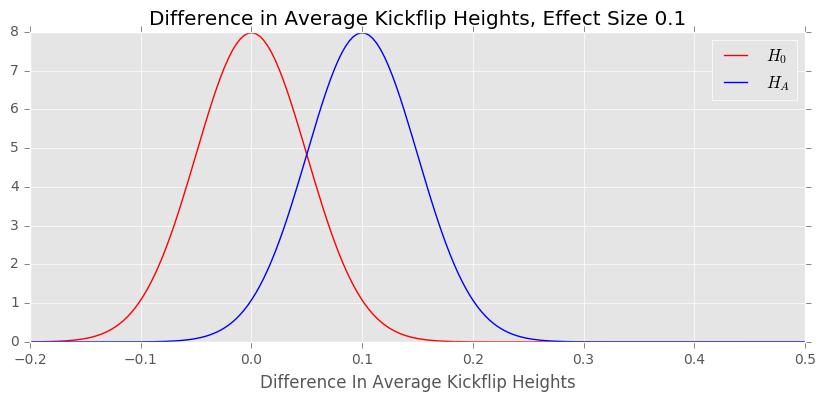

In [2]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_power(ax, n=100, sigma=0.5, effect_size=0.1)
ax.set_title("Difference in Average Kickflip Heights, Effect Size 0.1")
ax.set_xlabel("Difference In Average Kickflip Heights")

### z-testing For a Difference in Heights

Lets set up a z-test to detect whether we have increased our kickflip height at a level of

$$ \alpha = 0.05 $$

We'll assume that our sample size is 100, and we know the population standard deviation in height differences is 0.5 (otherwise we would have to estimate it from our data).  Under these assumptions, the distribution of kickflip heights under the null hypothesis is

$$ \text{Difference in Heights} \mid H_0 = Normal\left(0, \sigma=\frac{0.5}{\sqrt{100}}\right) $$

Then the p-value we need to get from our data to reject the null hypothesis satisfies

$$ p = F^{-1} (0.95) $$

where, as usual

$$ F^{-1} = \text{Percentile function of null distribution} $$

In our case, this computation works out to

In [3]:
null_distribution = scs.norm(0, 0.5/10)
critical_value = null_distribution.ppf(0.95)

print("Critical Value to Reject H_0: {:2.2f}".format(critical_value))

Critical Value to Reject H_0: 0.08


Let's plot this critical value on our plot, and shade the rejection reigon.

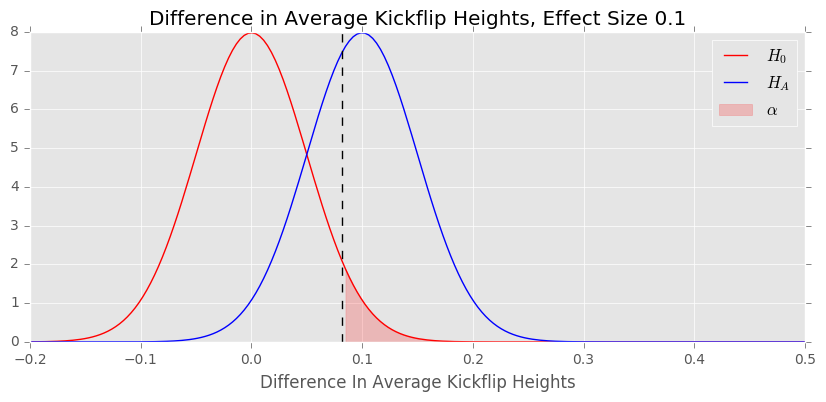

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_power(ax, n=100, sigma=0.5, effect_size=0.1, alpha=0.05)
ax.set_title("Difference in Average Kickflip Heights, Effect Size 0.1")
ax.set_xlabel("Difference In Average Kickflip Heights")

### Statistical Power

Now let's bring in our concept of power.  

As mentioned, to calculate the power, we need to assume a distribution under the **alternate hypothesis**, which is generally only possible when we can assume a specific effect size.  In practice, we assume the minimum effect size we want our test to reliably detect (we will have more to say on this point soon).  For this example, let's **assume the effect size we would like to detect is a tenth of a foot difference in heights**.

With this effect size, the distribution of height differences under the *alternate hypothesis* is

$$ \text{Difference in Heights} \mid H_a = Normal\left(0.1, \sigma=\frac{0.5}{\sqrt{100}}\right) $$

The power is the probability we detect an effect, when there actually is one

$$ \text{Power} = P( \text{Reject } H_0 \mid H_a ) $$

Let's add a shaded region to our plot representing the power of our test

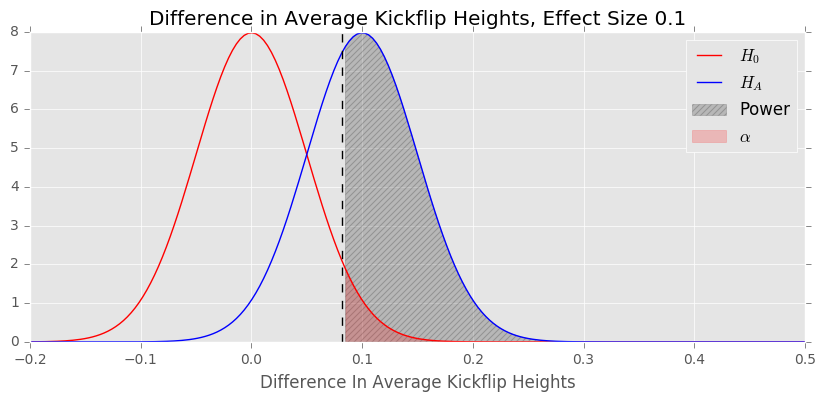

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_power(ax, n=100, sigma=0.5, effect_size=0.1, alpha=0.05, power=True)
ax.set_title("Difference in Average Kickflip Heights, Effect Size 0.1")
ax.set_xlabel("Difference In Average Kickflip Heights")

We can easily now calculate the power of our test

In [6]:
alternate_distribution = scs.norm(0.1, 0.5/10)
critical_value = null_distribution.ppf(0.95)
power = 1 - alternate_distribution.cdf(critical_value)

print("Power of Test: {:2.2f}".format(power))

Power of Test: 0.64


This is not that powerful of a test, we can only detect an effect of the size we would like to 64% of the time.

Another way to look at this: our false negative rate is 0.36 (beta), we will *fail* to detect an effect 36% of the time, even when it is truly there.

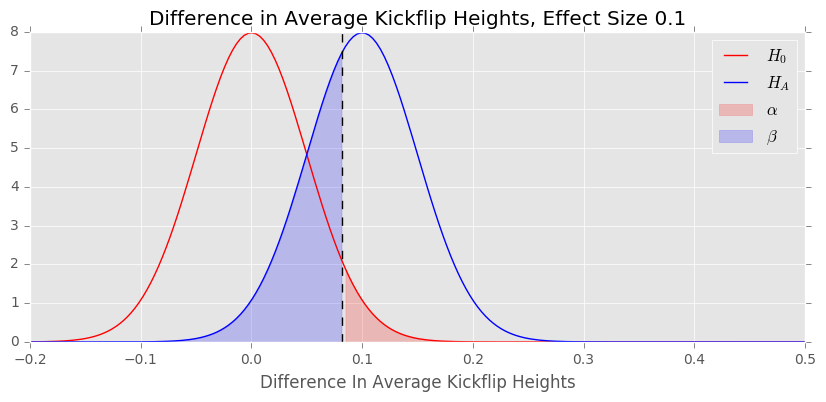

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_power(ax, n=100, sigma=0.5, effect_size=0.1, alpha=0.05, beta=True)
ax.set_title("Difference in Average Kickflip Heights, Effect Size 0.1")
ax.set_xlabel("Difference In Average Kickflip Heights")

## 3. The Effect of Sample Size and Effect Size on Power

The statistical power of a test is affected by a few different things:

  - The rejection level alpha.
  - The effect size we wish to detect.
  - The size of the sample we collect.
  
**Question:**

Try to think through how changing these different quantities will effect the power of our test.  Discuss your answers with a partner.

We've already discussed the relation between the power and the rejection level alpha.  As we decrease alpha, we **decrease** the false positive rate, **increase** the false negative rate, and thus **decrease** the power.  We can observe the effect of this by varying the rejection level in our pictures.

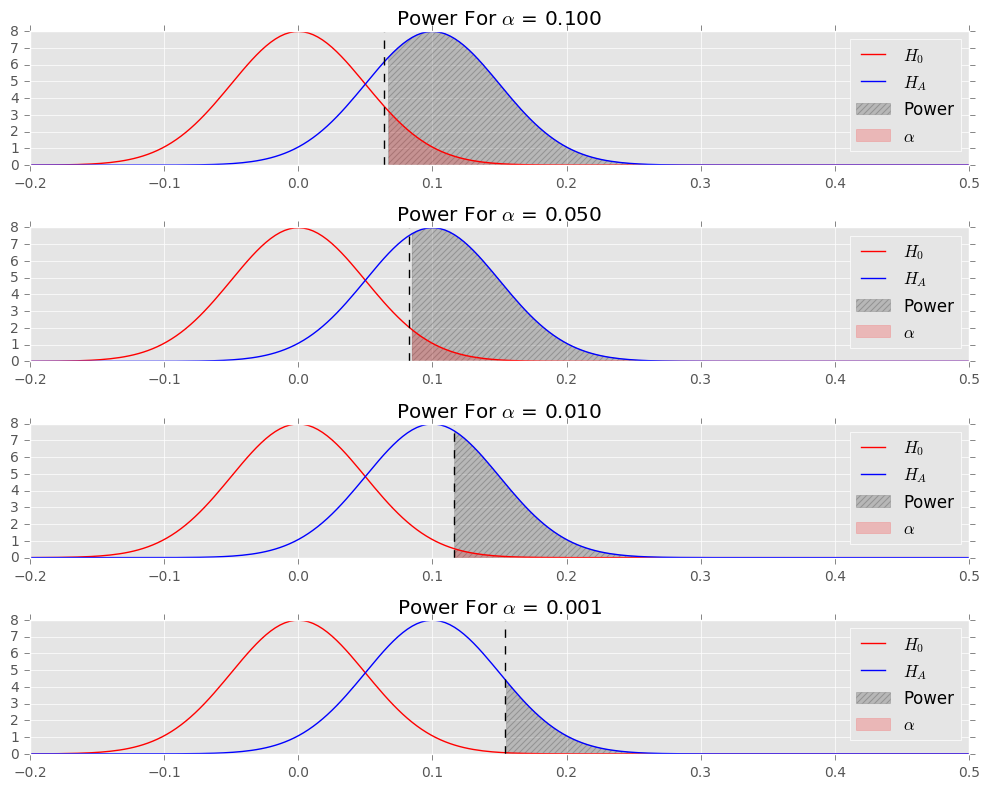

In [8]:
alphas = [0.1, 0.05, 0.01, 0.001]

fig, axs = plt.subplots(4, 1, figsize=(10, 8))
for alpha, ax in zip(alphas, axs):
    plot_power(ax, n=100, sigma=0.5, effect_size=0.1, alpha=alpha, power=True)
    ax.set_title("Power For $\\alpha$ = {:2.3f}".format(alpha))
    
plt.tight_layout()

The relationship between effect size and power is straightforward: it is easier to detect larger effects.  That is, as we **increase** the effect size we would like to detect, our power to detect that effect **increases**.  Said differently, it is much harder to detect minute effects than large ones.

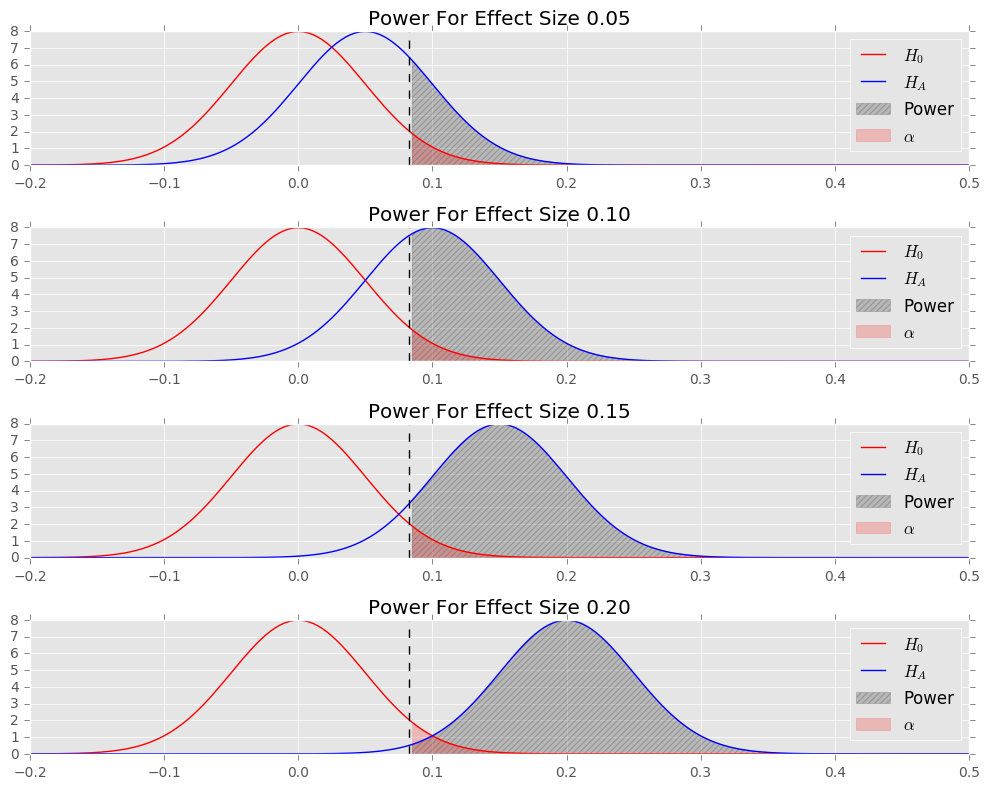

In [9]:
effect_sizes = [0.05, 0.1, 0.15, 0.2]

fig, axs = plt.subplots(4, 1, figsize=(10, 8))
for es, ax in zip(effect_sizes, axs):
    plot_power(ax, n=100, sigma=0.5, effect_size=es, alpha=0.05, power=True)
    ax.set_title("Power For Effect Size {:2.2f}".format(es))
    
plt.tight_layout()

Finally, the relationship between sample size and power is what one would expect, though its source is a bit more subtle than the other two relationships.  As we collect more data, we tighten our estimate of the sample mean (or whatever sample statistic we happen to be studying) as the standard error of the estimate decreases.  This tends to better seperate the null and alternate distributions, which **increases** the power.

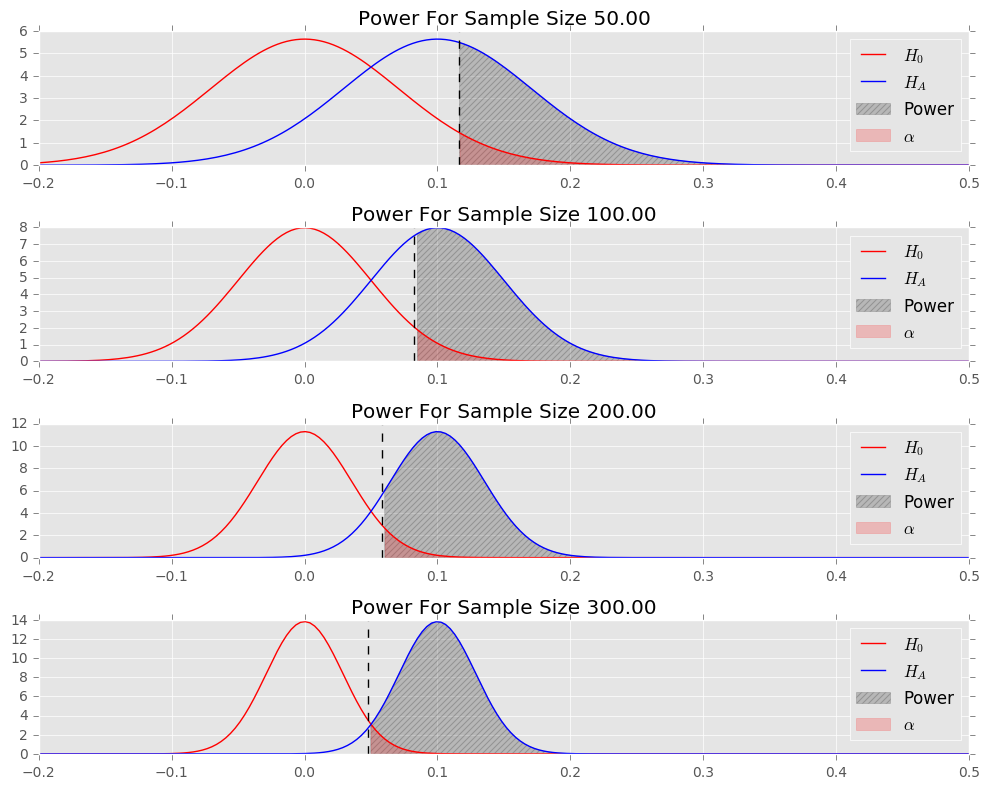

In [10]:
sample_sizes = [50, 100, 200, 300]

fig, axs = plt.subplots(4, 1, figsize=(10, 8))
for ss, ax in zip(sample_sizes, axs):
    plot_power(ax, n=ss, sigma=0.5, effect_size=0.1, alpha=0.05, power=True)
    ax.set_title("Power For Sample Size {:2.2f}".format(ss))
    
plt.tight_layout()

It is common to summarize these results in a **power curve**, which traces out the power of an experiment as the deisred effect size changes.  We can get a sense for how the sample size we collect affects the power by plotting multiple power curves.

In [11]:
def compute_power(n, sigma, effect_size, alpha):
    standard_error = sigma / n**0.5
    h0 = scs.norm(0, standard_error)
    ha = scs.norm(effect_size, standard_error)
    critical_value = h0.ppf(1 - alpha)
    power = 1 - ha.cdf(critical_value)
    return power

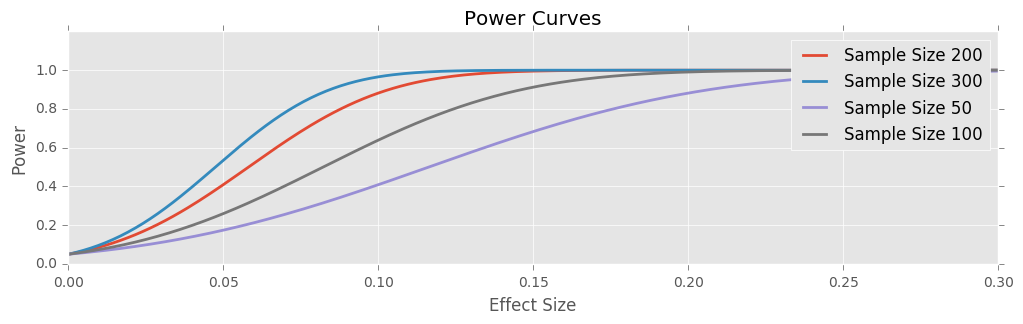

In [12]:
effect_sizes = np.linspace(0, 0.3, num=250)
powers = {
    sample_size: 
        [compute_power(sample_size, sigma=0.5, effect_size=es, alpha=0.05) for es in effect_sizes]
    for sample_size in sample_sizes
}

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
for ss, pw in powers.iteritems():
    ax.plot(effect_sizes, pw, linewidth=2, label="Sample Size {}".format(ss))
    
ax.set_ylim(0, 1.2)
ax.set_xlabel("Effect Size")
ax.set_ylabel("Power")
ax.set_title("Power Curves")
ax.legend()

## 4. Calculations

### Computing the Power of an Experiment

Let's start by computing the power for a known experiment.

The following picture represents our general setup

(-0.2, 0.4)

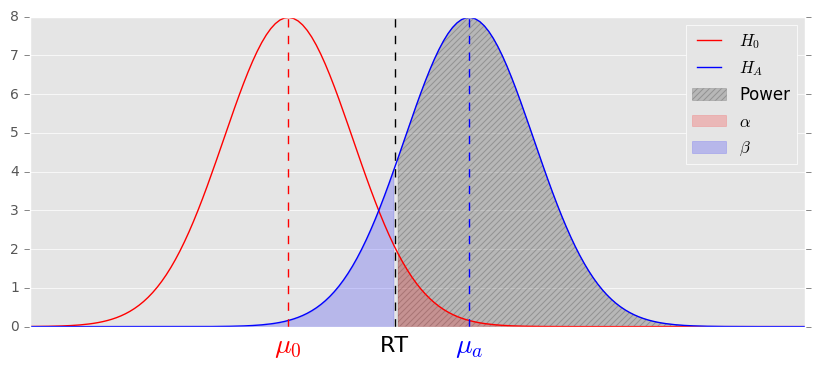

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_power(ax, n=100, sigma=0.5, effect_size=0.14, alpha=0.05, beta=True, x_labels=True, power=True)
ax.set_xlim(-0.2, 0.4)

In the picture above, mu_0 is the assumed sample mean under the null hypothesis (hence the normal distributions), and mu_a is the assumed mean under the alternate (so the difference is the effect size).  The black vertical line labeled "RT" is the rejection threshold (sometimes called the critical value).

To compute the power in a setup like this we first need to calculate the rejection threshold by using the percentile function of the null distribution, then compute the area under the alternate distribution to the right of the threshold.  This gives the shaded area, the power of the experiment.

In [14]:
def compute_power(n, sigma, alpha, mu0, mua):
    standard_error = sigma / n**0.5
    h0 = scs.norm(mu0, standard_error)
    ha = scs.norm(mua, standard_error)
    critical_value = h0.ppf(1 - alpha)
    power = 1 - ha.cdf(critical_value)
    return power

In [15]:
power = compute_power(100, 0.5, 0.05, 0, 0.1)

print("Power of Kickflip Experiment: {:2.2f}".format(power))

Power of Kickflip Experiment: 0.64


### Calculating the Sample Size Needed to Obtain a Given Power

Let's finish with a more complex computation that comes up more often in practice: we have a fixed signifigance level alpha, and we would like to know how large of a sample we need to collect in order to achieve a certain power.

We can express our setup as

$$ \text{Null Distribution} = Normal \left( \mu_0, SE \right) $$

$$ \text{Alternate Districution} = Normal \left( \mu_a, SE \right) $$

where

$$ SE = \frac{\sigma}{\sqrt{n}} $$

is the standard error of the sample mean.

We need one more piece of notation, let's denote the distribution function (i.e. CDF) of a normal distribution with mean mu and standard deviation sigma as

$$ F_{\mu, \sigma} = \text{Distribution Function of Normal Distribution} $$

Then the rejection threshold (aka critical value) is defined by the relation

$$ F_{\mu_0, SE}(RT) = 1 - \alpha $$

We can standardize the null distribution by subtracting the mean and dividing by the standard error.  If we apply this standardization to the rejection threshold, we get

$$ F_{0, 1} \left( \frac{RT - \mu_0}{SE} \right) = 1 - \alpha $$

or, applying the inverse function (aka the precentile function)

$$ \frac{RT - \mu_0}{SE} = F_{0, 1}^{-1} (1 - \alpha) $$

Let's follow the same procedure for the alternate distribution, starting with the relationship

$$ F_{\mu_a, SE}(RT) = \beta $$

Following the same path, we will arrive at

$$ \frac{RT - \mu_a}{SE} = F_{0, 1}^{-1} (\beta) $$

If we subtract these two equations, the RT's cancel, and we get

$$ \frac{\mu_a - \mu_0}{SE} = F_{0, 1}^{-1} (1 - \alpha) - F_{0, 1}^{-1} (\beta) $$

Shuffling things around, we can solve for n

$$ n = \left( \frac{ \sigma ( F_{0, 1}^{-1} (1 - \alpha) - F_{0, 1}^{-1} (\beta) ) } { \mu_a - \mu_0 } \right)^2 $$

This is the formula for the sample size needed to achive a given power (1 - beta).

In [16]:
def sample_size_needed_for_power(alpha, power, mu0, mua, sigma):
    standard_normal = scs.norm(0, 1)
    beta = 1 - power
    numerator = sigma * (standard_normal.ppf(1 - alpha) - standard_normal.ppf(beta))
    denominator = (mua - mu0)
    return (numerator / denominator) ** 2

Let's see how many (pairs of) kickflips we would have to perform to achive various powers in our experiment from before

In [17]:
alpha, mu0, mua, sigma = 0.05, 0.0, 0.1, 0.5
powers = [0.5, 0.75, 0.9, 0.99, 0.999]

for power in powers:
    print("Sample Size Needed to Achieve Power {:2.3f}: {}".format(
        power, sample_size_needed_for_power(alpha, power, mu0, mua, sigma)))

Sample Size Needed to Achieve Power 0.500: 67.6385863524
Sample Size Needed to Achieve Power 0.750: 134.483842528
Sample Size Needed to Achieve Power 0.900: 214.096183767
Sample Size Needed to Achieve Power 0.990: 394.261034037
Sample Size Needed to Achieve Power 0.999: 560.525969851


Clearly our formula does not always give an integer answer, and sample sizes should always be integers, so we really should round up to the next largest integer

In [18]:
for power in powers:
    print("Sample Size Needed to Achieve Power {:2.3f}: {}".format(
        power, round(sample_size_needed_for_power(alpha, power, mu0, mua, sigma))))

Sample Size Needed to Achieve Power 0.500: 68.0
Sample Size Needed to Achieve Power 0.750: 134.0
Sample Size Needed to Achieve Power 0.900: 214.0
Sample Size Needed to Achieve Power 0.990: 394.0
Sample Size Needed to Achieve Power 0.999: 561.0


We can check our answer using the function for computing power we created before

In [19]:
alpha, mu0, mua, sigma = 0.05, 0.0, 0.1, 0.5
powers = [0.5, 0.75, 0.9, 0.99, 0.999]

for power in powers:
    sample_size = sample_size_needed_for_power(alpha, power, mu0, mua, sigma)
    computed_power = compute_power(sample_size, sigma, alpha, mu0, mua)
    print("Power With Computed Sample Size {}: {:2.3f}".format(sample_size, computed_power))

Power With Computed Sample Size 67.6385863524: 0.500
Power With Computed Sample Size 134.483842528: 0.750
Power With Computed Sample Size 214.096183767: 0.900
Power With Computed Sample Size 394.261034037: 0.990
Power With Computed Sample Size 560.525969851: 0.999
